In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from adjustText import adjust_text

df = pd.read_excel('/Users/mac/Desktop/академэссе/regoins.xlsx', index_col=0)
df

ModuleNotFoundError: No module named 'sklearn'

In [2]:
df['invest_prev'] = df['invest_prev'].astype(str).str.replace('\xa0', '')
df['invest_after'] = df['invest_after'].astype(str).str.replace('\xa0', '')

df

,vpr,science,population,invest_prev,invest_after
region,,,,,
Белгородская область,73475,31,"1 514,5",147214,193558
Брянская область,33218,18,"1 152,5",62255,87395
Владимирская область,46067,30,"1 325,5",71513,179369
Воронежская область,45527,66,"2 285,3",264660,344140
Ивановская область,25512,20,"914,7",25713,59451
...,...,...,...,...,...
Амурская область,56930,15,756.2,102214,464064
Магаданская область,189490,10,134.3,60666,89647
Сахалинская область,212132,14,460.6,241464,269276


In [3]:
df['invest_after'].unique()

array(['193558', '87395', '179369', '344140', '59451', '135812', '36902',
       '202597', '166200', '1329379', '60551', '93396', '64905', '84983',
       '88853', '212315', '109628', '5917986', '95571', '118514',
       '192627', '167750', '140536', '545688', '256091', '57236', '39594',
       '997478', '46518', '14253', '214092', '690705', '86116', '216476',
       '465501', '72228', '314201', '22920', '57825', '34011', '43318',
       '119515', '286449', '512388', '42429', '59419', '888649', '137004',
       '93777', '357167', '84716', '462075', '234683', '103837', '446699',
       '207731', '105140', '54667', '541660', '3101824', '373143',
       '31140', '17314', '48196', '145865', '747818', '833682', '365621',
       '322428', '191360', '11765', '106119', '616285', '182105', '90935',
       '327860', '264735', '464064', '89647', '269276', '20116', '81267'],
      dtype=object)

In [4]:
df['invest_prev'] = df['invest_prev'].astype(int)
df['invest_after'] = df['invest_after'].astype(int)

df['invest_rate'] = df['invest_after'] / df['invest_prev']

df

,vpr,science,population,invest_prev,invest_after,invest_rate
region,,,,,,
Белгородская область,73475,31,"1 514,5",147214,193558,1.314807
Брянская область,33218,18,"1 152,5",62255,87395,1.403823
Владимирская область,46067,30,"1 325,5",71513,179369,2.508201
Воронежская область,45527,66,"2 285,3",264660,344140,1.300310
Ивановская область,25512,20,"914,7",25713,59451,2.312099
...,...,...,...,...,...,...
Амурская область,56930,15,756.2,102214,464064,4.540122
Магаданская область,189490,10,134.3,60666,89647,1.477714
Сахалинская область,212132,14,460.6,241464,269276,1.115181


In [5]:
df.drop(columns=['invest_prev', 'invest_after'], inplace=True)

In [6]:
df

,vpr,science,population,invest_rate
region,,,,
Белгородская область,73475,31,"1 514,5",1.314807
Брянская область,33218,18,"1 152,5",1.403823
Владимирская область,46067,30,"1 325,5",2.508201
Воронежская область,45527,66,"2 285,3",1.300310
Ивановская область,25512,20,"914,7",2.312099
...,...,...,...,...
Амурская область,56930,15,756.2,4.540122
Магаданская область,189490,10,134.3,1.477714
Сахалинская область,212132,14,460.6,1.115181


In [7]:
df['population'] = df['population'].astype(str).str.replace('\xa0', '')
df

,vpr,science,population,invest_rate
region,,,,
Белгородская область,73475,31,"1514,5",1.314807
Брянская область,33218,18,"1152,5",1.403823
Владимирская область,46067,30,"1325,5",2.508201
Воронежская область,45527,66,"2285,3",1.300310
Ивановская область,25512,20,"914,7",2.312099
...,...,...,...,...
Амурская область,56930,15,756.2,4.540122
Магаданская область,189490,10,134.3,1.477714
Сахалинская область,212132,14,460.6,1.115181


In [8]:
df['population'] = df['population'].astype(str).str.replace(',', '.')

In [9]:
df['population'] = df['population'].astype(float)
df

,vpr,science,population,invest_rate
region,,,,
Белгородская область,73475,31,1514.5,1.314807
Брянская область,33218,18,1152.5,1.403823
Владимирская область,46067,30,1325.5,2.508201
Воронежская область,45527,66,2285.3,1.300310
Ивановская область,25512,20,914.7,2.312099
...,...,...,...,...
Амурская область,56930,15,756.2,4.540122
Магаданская область,189490,10,134.3,1.477714
Сахалинская область,212132,14,460.6,1.115181


In [10]:
df.dtypes

vpr              int64
science          int64
population     float64
invest_rate    float64
dtype: object

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)

scaled_df

,vpr,science,population,invest_rate
region,,,,
Белгородская область,0.332508,-0.200389,-0.141619,-0.507263
Брянская область,-0.547431,-0.329617,-0.330484,-0.441580
Владимирская область,-0.266577,-0.210329,-0.240225,0.373317
Воронежская область,-0.278380,0.147534,0.260527,-0.517960
Ивановская область,-0.715869,-0.309736,-0.454550,0.228618
...,...,...,...,...
Амурская область,-0.029133,-0.359439,-0.537244,1.872628
Магаданская область,2.868368,-0.409142,-0.861705,-0.387057
Сахалинская область,3.363277,-0.369380,-0.691466,-0.654563


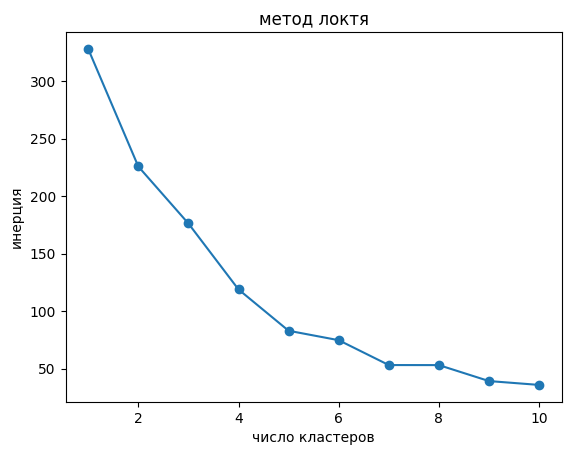

In [78]:
inert = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    inert.append(kmeans.inertia_)

plt.plot(range(1, 11), inert, marker='o')
plt.title('метод локтя')
plt.xlabel('число кластеров')
plt.ylabel('инерция')
plt.show()

In [143]:
kmeans = KMeans(n_clusters=5)
kmeans_labels = kmeans.fit_predict(scaled_data)

In [144]:
silhouette_kmeans = silhouette_score(scaled_data, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(scaled_data, kmeans_labels)

In [145]:
print("K-means:")
print(f"Silhouette Coefficient: {silhouette_kmeans}")
print(f"Davies-Bouldin Index: {davies_bouldin_kmeans}")

K-means:
Silhouette Coefficient: 0.599139562667059
Davies-Bouldin Index: 0.6329610386494002


In [146]:
kmeans_clusters = {}
for i, label in enumerate(kmeans_labels):
    region = df.index[i]
    if label not in kmeans_clusters:
        kmeans_clusters[label] = []
    kmeans_clusters[label].append(region)
print("\nK-means Clusters:")
print(kmeans_clusters)


K-means Clusters:
{0: ['Белгородская область', 'Брянская область', 'Владимирская область', 'Воронежская область', 'Ивановская область', 'Калужская область', 'Костромская область', 'Курская область', 'Липецкая область', 'Орловская область', 'Рязанская область', 'Смоленская область', 'Тамбовская область', 'Тверская область', 'Тульская область', 'Ярославская область', 'Республика Карелия', 'Республика Коми', 'Архангельская область', 'Вологодская область', 'Калининградская область', 'Ленинградская область', 'Новгородская область', 'Псковская область', 'Республика Адыгея', 'Республика Калмыкия', 'Республика Крым', 'Краснодарский край', 'Астраханская область', 'Волгоградская область', 'Ростовская область', 'Республика Дагестан', 'Республика Ингушетия\xa0', 'Кабардино-Балкарская Республика', 'Карачаево-Черкесская Республика', 'Республика Северная Осетия ', 'Чеченская Республика\xa0', 'Ставропольский край', 'Республика Башкортостан', 'Республика Марий Эл', 'Республика Мордовия', 'Республика Т

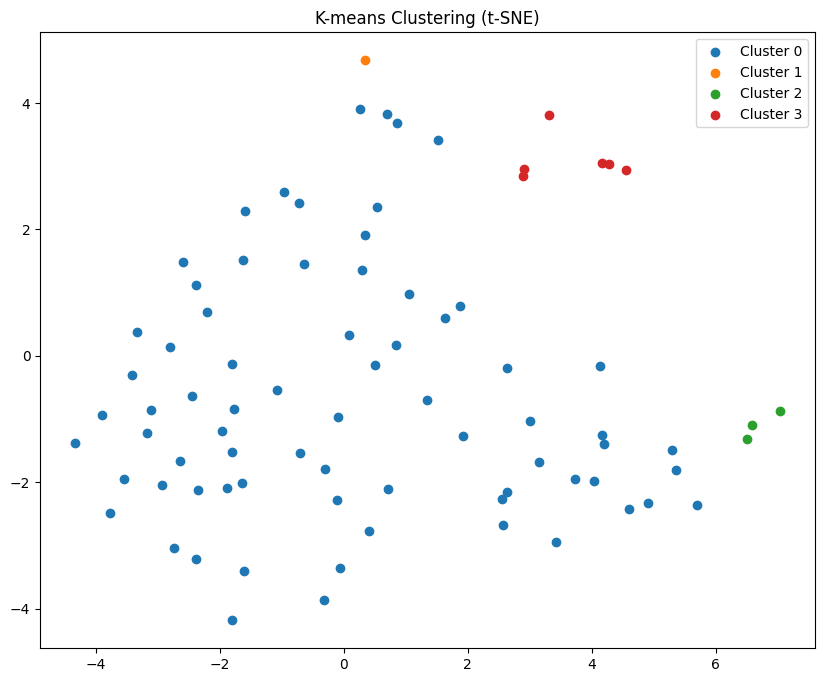

0

['Белгородская область', 'Брянская область', 'Владимирская область', 'Воронежская область', 'Ивановская область', 'Калужская область', 'Костромская область', 'Курская область', 'Липецкая область', 'Орловская область', 'Рязанская область', 'Смоленская область', 'Тамбовская область', 'Тверская область', 'Тульская область', 'Ярославская область', 'Республика Карелия', 'Республика Коми', 'Архангельская область', 'Вологодская область', 'Калининградская область', 'Ленинградская область', 'Новгородская область', 'Псковская область', 'Республика Адыгея', 'Республика Калмыкия', 'Республика Крым', 'Краснодарский край', 'Астраханская область', 'Волгоградская область', 'Ростовская область', 'Республика Дагестан', 'Республика Ингушетия\xa0', 'Кабардино-Балкарская Республика', 'Карачаево-Черкесская Республика', 'Республика Северная Осетия ', 'Чеченская Республика\xa0', 'Ставропольский край', 'Республика Башкортостан', 'Республика Марий Эл', 'Республика Мордовия', 'Республика Татарстан', 'Удмуртск

In [147]:
from sklearn.manifold import TSNE
from adjustText import adjust_text

tsne = TSNE(n_components=2, random_state=42)
tsne_results_kmeans = tsne.fit_transform(scaled_data)
tsne_results_dbscan = tsne.fit_transform(scaled_data)




plt.figure(figsize=(10, 8))  
for i in range(len(kmeans_clusters)):
    plt.scatter(tsne_results_kmeans[kmeans_labels == i, 0], tsne_results_kmeans[kmeans_labels == i, 1], label=f'Cluster {i}')
plt.title('K-means Clustering (t-SNE)')
plt.legend()




plt.show()

for keys, values in kmeans_clusters.items():
    print(keys)
    print()
    print(values)
    print()


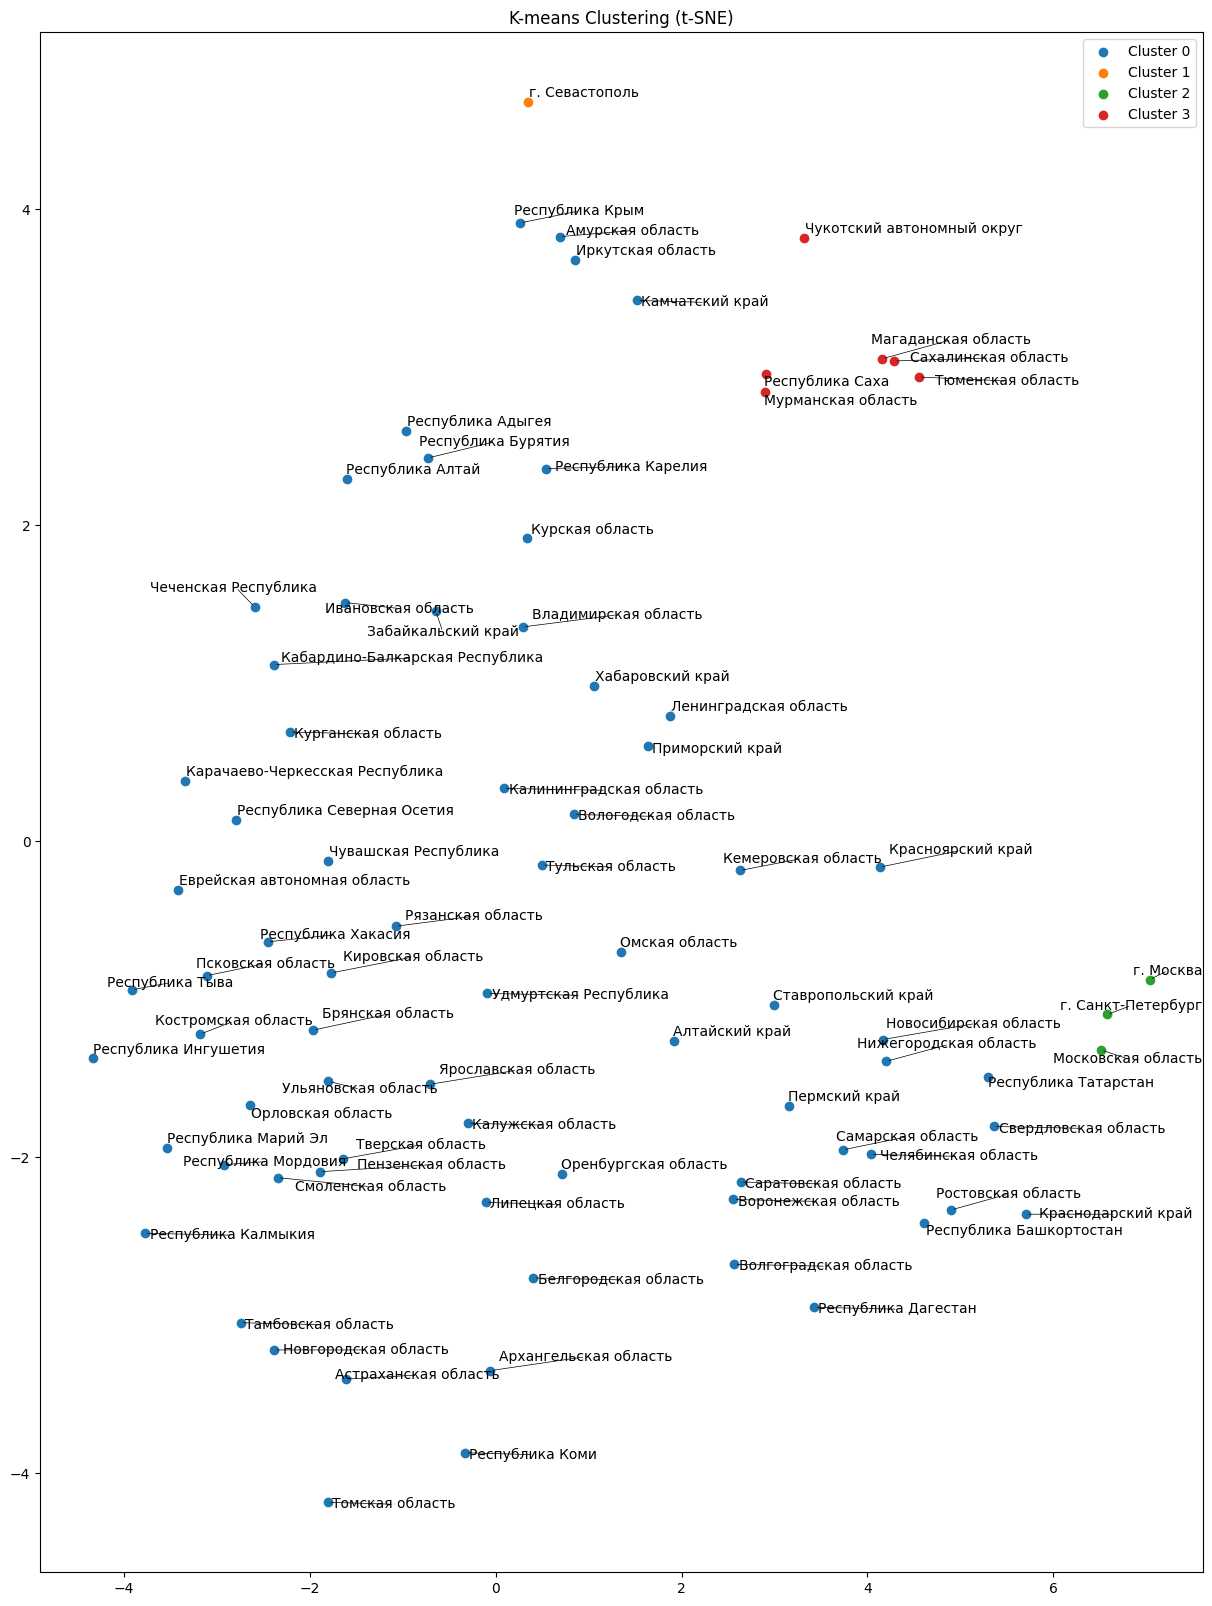

In [ ]:
def plot_clusters(results, labels, regions, title):
    plt.figure(figsize=(18, 20))
    unique_labels = set(labels)
    for label in unique_labels:
        if label == -1: 
            plt.scatter(results[labels == label, 0], results[labels == label, 1], label=f'Noise', color='grey')
        else:
            plt.scatter(results[labels == label, 0], results[labels == label, 1], label=f'Cluster {label}')

    texts = []
    for i, txt in enumerate(regions):
        texts.append(plt.text(results[i, 0], results[i, 1], txt))

    adjust_text(texts, autoalign='xy', expand_points=(2,2),  arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

    plt.title(title)
    plt.legend()
    plt.show()


plot_clusters(tsne_results_kmeans, kmeans_labels, df.index, 'K-means Clustering (t-SNE)')

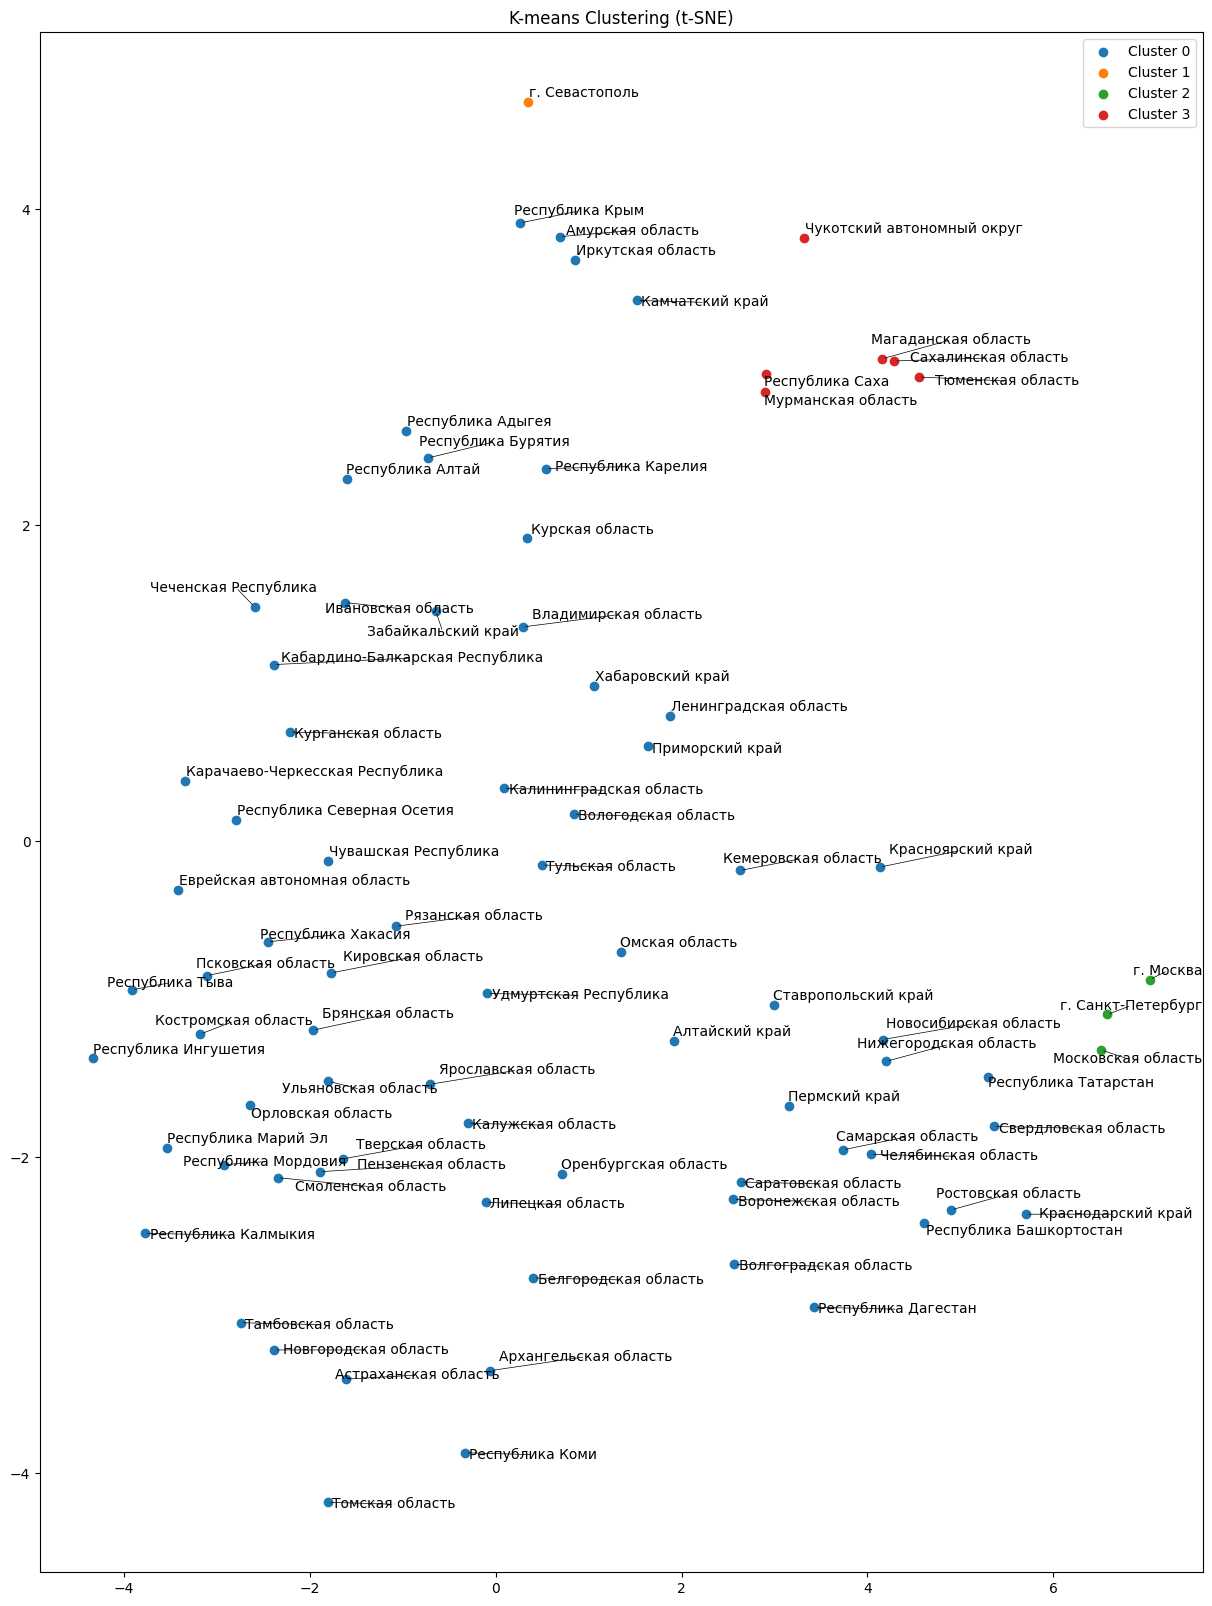


Cluster Means:
Cluster 0: vpr            44861.458333
science           35.680556
population      1561.706944
invest_rate        1.799665
dtype: float64
Cluster 1: vpr            27223.000000
science           10.000000
population       558.300000
invest_rate       11.013724
dtype: float64
Cluster 2: vpr            127013.333333
science           485.333333
population       9098.633333
invest_rate         2.675981
dtype: float64
Cluster 3: vpr            189877.333333
science            26.666667
population       1025.050000
invest_rate         2.594736
dtype: float64


In [149]:
def display_cluster_means(df, labels, n_clusters):
    cluster_means = []
    for i in range(n_clusters):
        cluster_data = df[labels == i]
        means = cluster_data.mean()
        cluster_means.append(means)

    print("\nCluster Means:")
    for i, means in enumerate(cluster_means):
        print(f"Cluster {i}: {means}")

def plot_clusters(results, labels, regions, df, title, n_clusters):
    plt.figure(figsize=(15, 20))
    unique_labels = set(labels)
    for label in unique_labels:
        if label == -1: 
            plt.scatter(results[labels == label, 0], results[labels == label, 1], label=f'Noise', color='grey')
        else:
            plt.scatter(results[labels == label, 0], results[labels == label, 1], label=f'Cluster {label}')

    texts = []
    for i, txt in enumerate(regions):
        texts.append(plt.text(results[i, 0], results[i, 1], txt))

    adjust_text(texts, autoalign='xy', expand_points=(2,2),  arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

    plt.title(title)
    plt.legend()
    plt.show()

    display_cluster_means(df, labels, n_clusters)



n_clusters_kmeans = len(set(kmeans_labels)) - (1 if -1 in kmeans_labels else 0) 

plot_clusters(tsne_results_kmeans, kmeans_labels, df.index, df, 'K-means Clustering (t-SNE)', n_clusters_kmeans)

In [153]:
dbscan = DBSCAN(eps=0.8, min_samples=2)
dbscan_labels = dbscan.fit_predict(scaled_data)

unique_labels = set(dbscan_labels)
if -1 in unique_labels:
    n_clusters = len(unique_labels) - 1
    print(f"\nDBSCAN обнаружил {n_clusters} кластеров и {np.sum(dbscan_labels == -1)} точек шума.")
    filtered_data = scaled_data[dbscan_labels != -1]
    filtered_labels = dbscan_labels[dbscan_labels != -1]

    if len(filtered_labels) > 0:
        silhouette_dbscan = silhouette_score(filtered_data, filtered_labels)
        davies_bouldin_dbscan = davies_bouldin_score(filtered_data, filtered_labels)
        print("\nDBSCAN (без шума):")
        print(f"Silhouette Coefficient: {silhouette_dbscan}")
        print(f"Davies-Bouldin Index: {davies_bouldin_dbscan}")

        dbscan_clusters = {}
        for i, label in enumerate(filtered_labels):
          if dbscan_labels[i] != -1: 
            region = df.index[i]
            if label not in dbscan_clusters:
                dbscan_clusters[label] = []
            dbscan_clusters[label].append(region)
        print("\nDBSCAN Clusters:")
        print(dbscan_clusters)

    else:
        print("\nDBSCAN: все точки отнесены к шуму. Кластеры не могут быть вычислены.")

else:
    print("\nDBSCAN:")
    silhouette_dbscan = silhouette_score(scaled_data, dbscan_labels)
    davies_bouldin_dbscan = davies_bouldin_score(scaled_data, dbscan_labels)
    print(f"Silhouette Coefficient: {silhouette_dbscan}")
    print(f"Davies-Bouldin Index: {davies_bouldin_dbscan}")

    dbscan_clusters = {}
    for i, label in enumerate(dbscan_labels):
        region = df.index[i]
        if label not in dbscan_clusters:
            dbscan_clusters[label] = []
        dbscan_clusters[label].append(region)
    print("\nDBSCAN Clusters:")
    print(dbscan_clusters)


DBSCAN обнаружил 3 кластеров и 11 точек шума.

DBSCAN (без шума):
Silhouette Coefficient: 0.5212120145997249
Davies-Bouldin Index: 0.4241277724687907

DBSCAN Clusters:
{0: ['Белгородская область', 'Брянская область', 'Владимирская область', 'Воронежская область', 'Ивановская область', 'Калужская область', 'Костромская область', 'Курская область', 'Липецкая область', 'Орловская область', 'Рязанская область', 'Смоленская область', 'Тамбовская область', 'Тверская область', 'Тульская область', 'Ярославская область', 'Республика Карелия', 'Республика Коми', 'Архангельская область', 'Вологодская область', 'Ленинградская область', 'Мурманская область', 'Новгородская область', 'Псковская область', 'Республика Адыгея', 'Республика Калмыкия', 'Астраханская область', 'Волгоградская область', 'Ростовская область', 'Республика Дагестан', 'Республика Ингушетия\xa0', 'Кабардино-Балкарская Республика', 'Карачаево-Черкесская Республика', 'Республика Северная Осетия ', 'Чеченская Республика\xa0', 'Став

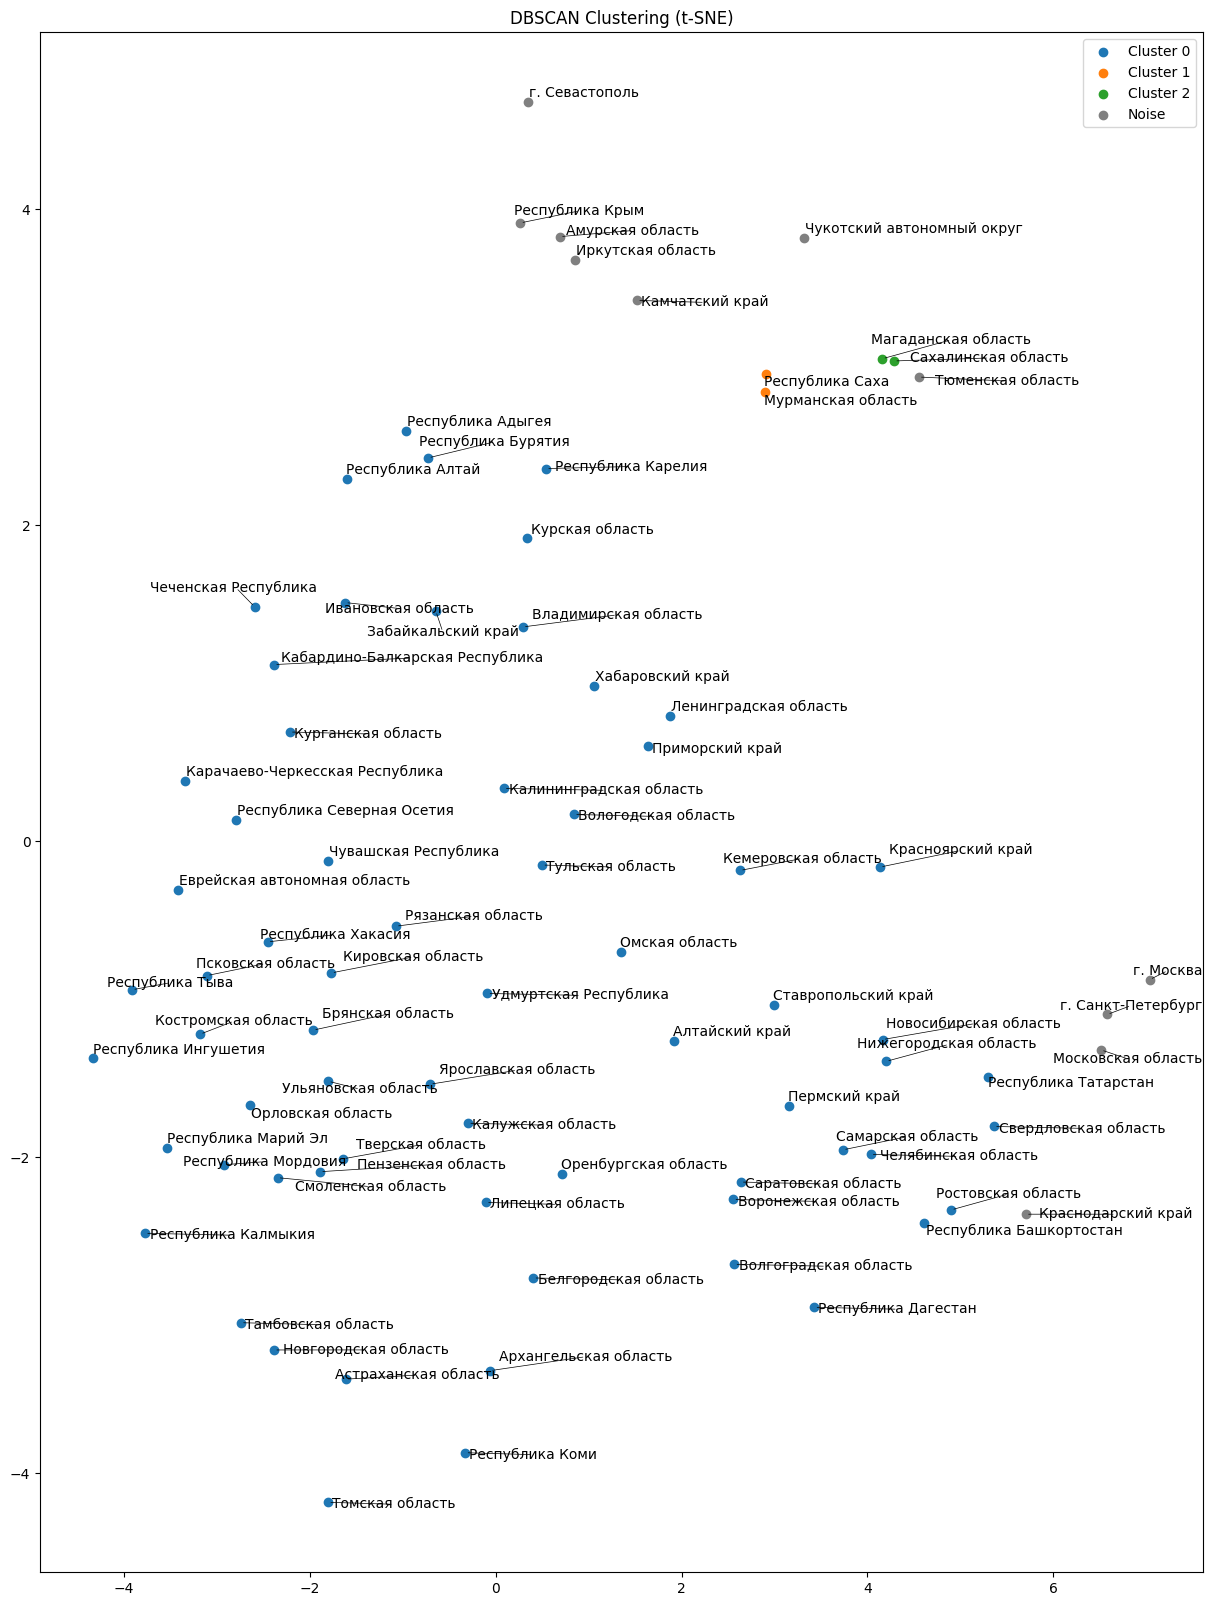


Cluster Means:
Cluster 0: vpr            43919.119403
science           35.149254
population      1512.201493
invest_rate        1.661706
dtype: float64
Cluster 1: vpr            130170.000000
science            35.000000
population        828.150000
invest_rate         2.831149
dtype: float64
Cluster 2: vpr            200811.000000
science            12.000000
population        297.450000
invest_rate         1.296447
dtype: float64


In [142]:
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0) 
plot_clusters(tsne_results_dbscan, dbscan_labels, df.index, df, 'DBSCAN Clustering (t-SNE)', n_clusters_dbscan)